# Time series analysis using ARIMA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
df=pd.read_csv('airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [53]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [54]:
df.dropna(axis=0,inplace=True)

In [55]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [56]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [57]:
df['Month']=pd.to_datetime(df['Month'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [59]:
df.set_index(['Month'],inplace=True)

In [60]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


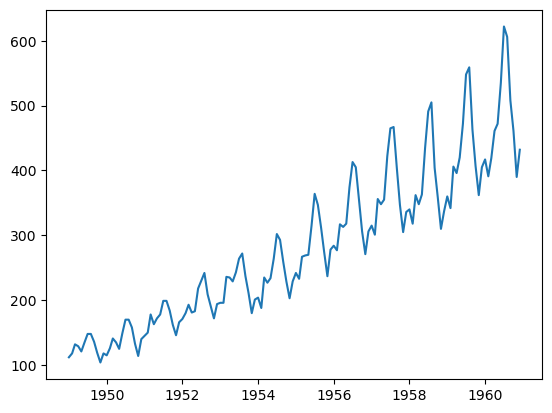

In [61]:
plt.plot(df)

In [62]:
from statsmodels.tsa.stattools import adfuller

In [29]:
#Ho: It is non stationary
#H1: It is stationary

result=adfuller(df['Thousands of Passengers'])
result[1]
#p>0.05 so we accept the null hypothesis

0.9918802434376409

In [32]:
#therefore we will apply difference technique to make stationary
df['passenger first difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(1)

In [33]:
df.head()

,Thousands of Passengers,passenger first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [ ]:
df.dropna(axis=0,inplace=True)
result=adfuller(df['passenger first difference'])
result[1]

In [63]:
#again shift by 2 as p is greater than 0.05
df['passenger first difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(2)
result=adfuller(df['passenger first difference'].dropna())
result[1]

0.03862975767698849

In [64]:
#makes the series stationary now as now the p value is 0.03 means we reject the null hypothesis
df.head()

,Thousands of Passengers,passenger first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [65]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


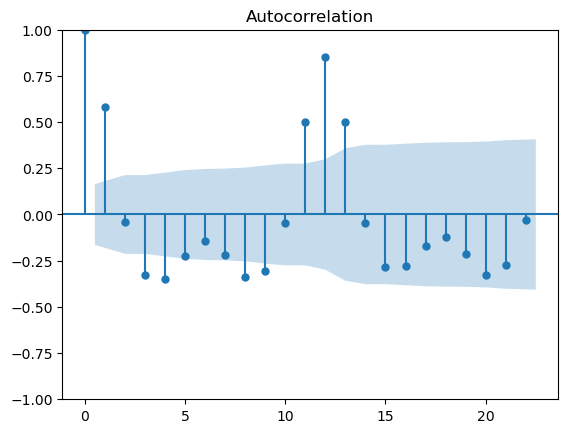

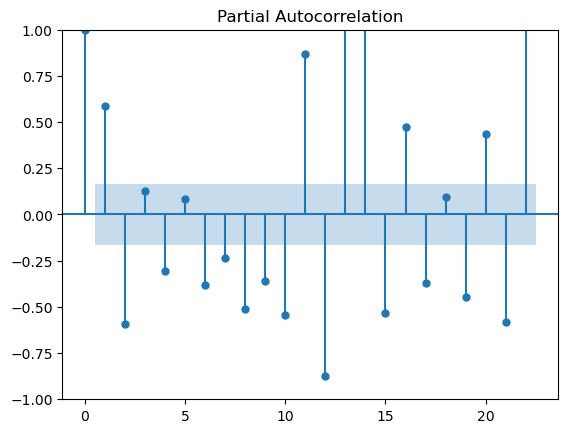

In [66]:

acf=plot_acf(df['passenger first difference'].dropna())
pacf=plot_pacf(df['passenger first difference'].dropna())

In [67]:
#train and test data
from datetime import datetime,timedelta

In [69]:
train=df.loc['1949-01-01':'1955-12-01']

In [70]:
test=df.loc['1956-01-01':]

In [71]:
train

,Thousands of Passengers,passenger first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1955-08-01,347.0,32.0
1955-09-01,312.0,-52.0
1955-10-01,274.0,-73.0


In [72]:
test

,Thousands of Passengers,passenger first difference
Month,,
1956-01-01,284.0,47.0
1956-02-01,277.0,-1.0
1956-03-01,317.0,33.0
1956-04-01,313.0,36.0
1956-05-01,318.0,1.0
1956-06-01,374.0,61.0
1956-07-01,413.0,95.0
1956-08-01,405.0,31.0
1956-09-01,355.0,-58.0


In [73]:
## create a ARIMA model
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [76]:
A=ARIMA(train['Thousands of Passengers'],order=(14,2,12))

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [77]:
AM=A.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
pred=AM.predict(start=test.index[0],end=test.index[-1])

In [86]:
pred

1956-01-01    283.919450
1956-02-01    280.455148
1956-03-01    291.173475
1956-04-01    303.382666
1956-05-01    301.711645
1956-06-01    344.747759
1956-07-01    394.043893
1956-08-01    369.450170
1956-09-01    343.771469
1956-10-01    304.845265
1956-11-01    272.407759
1956-12-01    303.251456
1957-01-01    318.172248
1957-02-01    305.086846
1957-03-01    317.771695
1957-04-01    326.570703
1957-05-01    332.070856
1957-06-01    376.186035
1957-07-01    419.272748
1957-08-01    397.979251
1957-09-01    369.189518
1957-10-01    335.397230
1957-11-01    306.830412
1957-12-01    332.327193
1958-01-01    348.720895
1958-02-01    333.462762
1958-03-01    341.874467
1958-04-01    352.910062
1958-05-01    361.423359
1958-06-01    407.431250
1958-07-01    445.096244
1958-08-01    425.738344
1958-09-01    395.564373
1958-10-01    365.762166
1958-11-01    340.873198
1958-12-01    362.470170
1959-01-01    378.175681
1959-02-01    362.026688
1959-03-01    366.413113
1959-04-01    379.388727


In [87]:
residual=test['Thousands of Passengers']-pred
residual

Month
1956-01-01      0.080550
1956-02-01     -3.455148
1956-03-01     25.826525
1956-04-01      9.617334
1956-05-01     16.288355
1956-06-01     29.252241
1956-07-01     18.956107
1956-08-01     35.549830
1956-09-01     11.228531
1956-10-01      1.154735
1956-11-01     -1.407759
1956-12-01      2.748544
1957-01-01     -3.172248
1957-02-01     -4.086846
1957-03-01     38.228305
1957-04-01     21.429297
1957-05-01     22.929144
1957-06-01     45.813965
1957-07-01     45.727252
1957-08-01     69.020749
1957-09-01     34.810482
1957-10-01     11.602770
1957-11-01     -1.830412
1957-12-01      3.672807
1958-01-01     -8.720895
1958-02-01    -15.462762
1958-03-01     20.125533
1958-04-01     -4.910062
1958-05-01      1.576641
1958-06-01     27.568750
1958-07-01     45.903756
1958-08-01     79.261656
1958-09-01      8.435627
1958-10-01     -6.762166
1958-11-01    -30.873198
1958-12-01    -25.470170
1959-01-01    -18.175681
1959-02-01    -20.026688
1959-03-01     39.586887
1959-04-01     16.6

In [89]:
residual.mean()

22.98863269345728

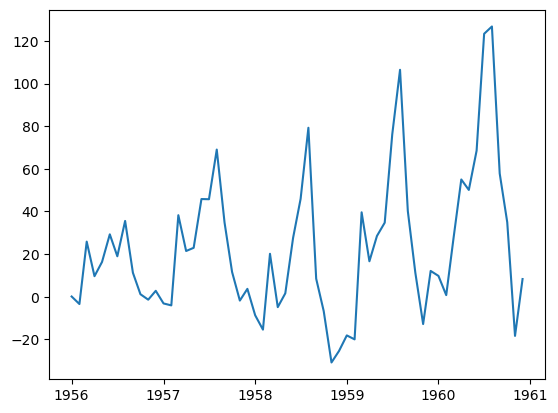

In [90]:
plt.plot(residual)

<Axes: xlabel='Month'>

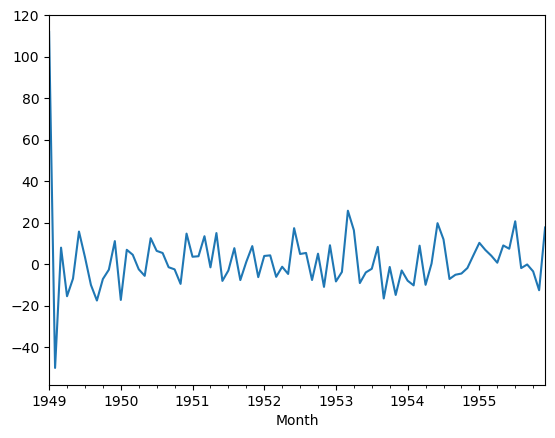

In [91]:
AM.resid.plot()

In [92]:
test['Predicted value']=pred

C:\Users\dell\AppData\Local\Temp\ipykernel_4168\3814215645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted value']=pred


In [93]:
test

,Thousands of Passengers,passenger first difference,Predicted value
Month,,,
1956-01-01,284.0,47.0,283.919450
1956-02-01,277.0,-1.0,280.455148
1956-03-01,317.0,33.0,291.173475
1956-04-01,313.0,36.0,303.382666
1956-05-01,318.0,1.0,301.711645
1956-06-01,374.0,61.0,344.747759
1956-07-01,413.0,95.0,394.043893
1956-08-01,405.0,31.0,369.450170
1956-09-01,355.0,-58.0,343.771469


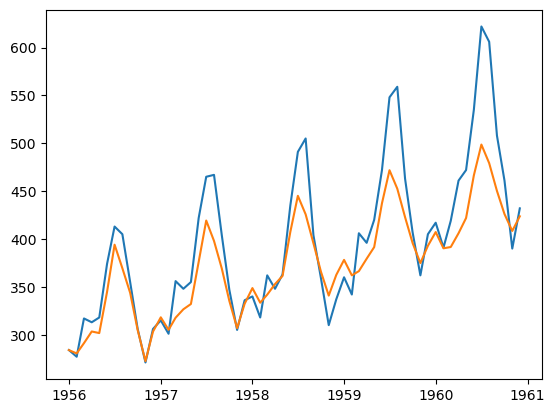

In [95]:
plt.plot(test[['Thousands of Passengers','Predicted value']])

<Axes: xlabel='Month'>

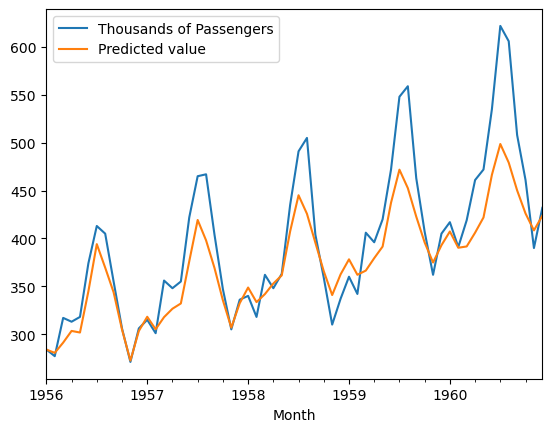

In [97]:
test[['Thousands of Passengers','Predicted value']].plot()

In [98]:
df.head()

,Thousands of Passengers,passenger first difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0


In [100]:
df.tail()

,Thousands of Passengers,passenger first difference
Month,,
1960-08-01,606.0,71.0
1960-09-01,508.0,-114.0
1960-10-01,461.0,-145.0
1960-11-01,390.0,-118.0
1960-12-01,432.0,-29.0


In [114]:
from pandas.tseries.offsets import DateOffset

In [115]:
futuredate=[df.index[-1]+DateOffset(months=x)for x in range(0,25)]

In [118]:
futuredate

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00')]

In [119]:
futuredatedf=pd.DataFrame(index=futuredate[1:],columns=df.columns)

In [120]:
futuredatedf.head()

,Thousands of Passengers,passenger first difference
1961-01-01,NaN,NaN
1961-02-01,NaN,NaN
1961-03-01,NaN,NaN
1961-04-01,NaN,NaN
1961-05-01,NaN,NaN


In [121]:
dffuture=pd.concat([df,futuredatedf])

In [122]:
dffuture

,Thousands of Passengers,passenger first difference
1949-01-01,112.0,NaN
1949-02-01,118.0,NaN
1949-03-01,132.0,20.0
1949-04-01,129.0,11.0
1949-05-01,121.0,-11.0
...,...,...
1962-08-01,NaN,NaN
1962-09-01,NaN,NaN
1962-10-01,NaN,NaN
1962-11-01,NaN,NaN


In [124]:
dffuture['forecast']=AM.predict(start='1961-01-01',end='1962-12-01')

In [125]:
dffuture

,Thousands of Passengers,passenger first difference,forecast
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,NaN,NaN
1949-03-01,132.0,20.0,NaN
1949-04-01,129.0,11.0,NaN
1949-05-01,121.0,-11.0,NaN
...,...,...,...
1962-08-01,NaN,NaN,532.690037
1962-09-01,NaN,NaN,505.363384
1962-10-01,NaN,NaN,487.023184
1962-11-01,NaN,NaN,474.772491


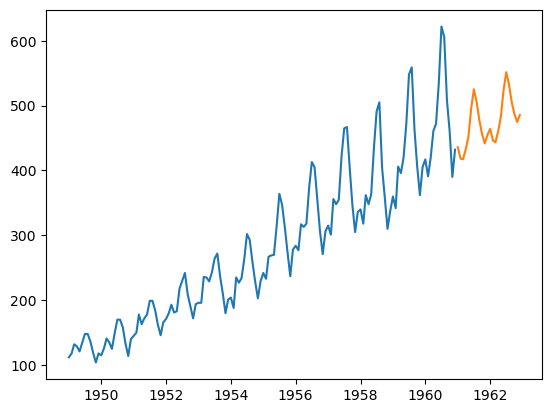

In [126]:
plt.plot(dffuture[['Thousands of Passengers','forecast']])

In [127]:
dffuture[['Thousands of Passengers', 'forecast']].tail(24)

,Thousands of Passengers,forecast
1961-01-01,NaN,435.882029
1961-02-01,NaN,418.394756
1961-03-01,NaN,417.256435
1961-04-01,NaN,433.011381
1961-05-01,NaN,452.205494
1961-06-01,NaN,495.431308
1961-07-01,NaN,525.208366
1961-08-01,NaN,505.960301
1961-09-01,NaN,477.682013
1961-10-01,NaN,456.511509
